# Introduction

<h2> Multiple Linear Regression</h2>

<h4><u> Problem Statement</u></h4>

<h4>Use-Case</h4>
<p>A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.</p>

<h4>Problem</h4>   
<p> A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.</p>

<h4>Requirement</h4>

<li>Which variables are significant in predicting the demand for shared bikes.</li>
 <li>How well those variables describe the bike demands.</li>
 

<h4> Goal</h4>
<li>Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.</li>
<li>It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.</li>

# Step 1- import Statements

In [ ]:
# supress Warning
import warnings
warnings.filterwarnings('ignore')

In [4]:
#libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
# read the data from csv file
bike_data = pd.read_csv('day.csv')

In [6]:
# understand the data
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# shape of the data
bike_data.shape

(730, 16)

In [8]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<p> Here, all the colums have value as non-null so no data cleaning is required</p>

In [9]:
# lets describe the data by understanding cumulative value for each
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<h4> Since the difference between  mean and median is not much we can conclude that the we do not have no outliners</h4>

In [10]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
#check for datatype
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# Step 2- Cleaning Data

<h3> Drop columns that are not useful for analysis</h3>
<li> All other columns have datatype as "int64" or "float64" other than 'dteday' and also we have details like 'mnth', 'yr' and 'weekday' describing the same</li>
<li> We will also drop column 'instant' , as it denotes only the index </li>
<li> We know that 'cnt' column is out target variable and it is total of 'casual' + 'registered'. Hence dropping the same</li>

In [12]:
# Before dropping the 'dteday' lets create a date format from available data
bike_data['date_old'] = (pd.to_datetime(bike_data['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [17]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [15]:
# dropping columns 'dteday'
bike_data.drop(['dteday'], axis = 1, inplace = True)

In [16]:
# dropping columns 'instant'
bike_data.drop(['instant'], axis = 1, inplace = True)

In [18]:
# dropping columns 'casual' and 'registered'
bike_data.drop(['casual'], axis = 1, inplace = True)
bike_data.drop(['registered'], axis = 1, inplace = True)

In [19]:
#final data 
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,date_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [20]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  date_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [21]:
bike_data.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [22]:
bike_data.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [23]:
#Correlation
bike_data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,date_old
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534,-0.000023
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542,-0.004619
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


<li>we can see that features like season, mnth, weekday and weathersit are integers although they should be non-numerical categories.</li>
<li> The above are Categorical variable.</li>
<li> Changing the value according to the given txt file containing all the corresponding String value for numeric</li>

In [24]:
# values for 'season'
bike_data['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)

In [25]:
bike_data.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,date_old
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4
5,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606,5
6,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510,6
7,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959,7
8,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822,8
9,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321,9


In [26]:
# values for 'weathersit'
bike_data['weathersit'].replace({1:"Clear,Few Clouds,Partly Cloudy",2:"Mist,Mist Cloudy,Mist Broken Cloudy,Mist Few cloud",3:"Light Snow, Light Rain Thunderstorm Scattered clouds, Light Rain",4:'Heavy Rain Ice Pallets Thunderstorm Mist, Snow Fog'},inplace=True)
bike_data.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,date_old
0,spring,0,1,0,6,0,"Mist,Mist Cloudy,Mist Broken Cloudy,Mist Few c...",14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,1,0,0,0,"Mist,Mist Cloudy,Mist Broken Cloudy,Mist Few c...",14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,1,0,1,1,"Clear,Few Clouds,Partly Cloudy",8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,1,0,2,1,"Clear,Few Clouds,Partly Cloudy",8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,1,0,3,1,"Clear,Few Clouds,Partly Cloudy",9.305237,11.46350,43.6957,12.522300,1600,4
5,spring,0,1,0,4,1,"Clear,Few Clouds,Partly Cloudy",8.378268,11.66045,51.8261,6.000868,1606,5
6,spring,0,1,0,5,1,"Mist,Mist Cloudy,Mist Broken Cloudy,Mist Few c...",8.057402,10.44195,49.8696,11.304642,1510,6
7,spring,0,1,0,6,0,"Mist,Mist Cloudy,Mist Broken Cloudy,Mist Few c...",6.765000,8.11270,53.5833,17.875868,959,7
8,spring,0,1,0,0,0,"Clear,Few Clouds,Partly Cloudy",5.671653,5.80875,43.4167,24.250650,822,8
9,spring,0,1,0,1,1,"Clear,Few Clouds,Partly Cloudy",6.184153,7.54440,48.2917,14.958889,1321,9


In [27]:
#values of 'weekday'
bike_data['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
bike_data.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,date_old
0,spring,0,1,0,Saturday,0,"Mist,Mist Cloudy,Mist Broken Cloudy,Mist Few c...",14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,1,0,Sunday,0,"Mist,Mist Cloudy,Mist Broken Cloudy,Mist Few c...",14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,1,0,Monday,1,"Clear,Few Clouds,Partly Cloudy",8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,1,0,Tuesday,1,"Clear,Few Clouds,Partly Cloudy",8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,1,0,Wednesday,1,"Clear,Few Clouds,Partly Cloudy",9.305237,11.46350,43.6957,12.522300,1600,4
5,spring,0,1,0,Thursday,1,"Clear,Few Clouds,Partly Cloudy",8.378268,11.66045,51.8261,6.000868,1606,5
6,spring,0,1,0,Friday,1,"Mist,Mist Cloudy,Mist Broken Cloudy,Mist Few c...",8.057402,10.44195,49.8696,11.304642,1510,6
7,spring,0,1,0,Saturday,0,"Mist,Mist Cloudy,Mist Broken Cloudy,Mist Few c...",6.765000,8.11270,53.5833,17.875868,959,7
8,spring,0,1,0,Sunday,0,"Clear,Few Clouds,Partly Cloudy",5.671653,5.80875,43.4167,24.250650,822,8
9,spring,0,1,0,Monday,1,"Clear,Few Clouds,Partly Cloudy",6.184153,7.54440,48.2917,14.958889,1321,9


In [29]:
bike_data['mnth'].replace({1: 'January',2: 'Feburary',3: 'March',4: 'April',5: 'May',6: 'June',
                  7: 'July',8: 'August',9: 'September',10: 'October',11: 'November',12: 'December'})
bike_data.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,date_old
0,spring,0,1,0,Saturday,0,"Mist,Mist Cloudy,Mist Broken Cloudy,Mist Few c...",14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,1,0,Sunday,0,"Mist,Mist Cloudy,Mist Broken Cloudy,Mist Few c...",14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,1,0,Monday,1,"Clear,Few Clouds,Partly Cloudy",8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,1,0,Tuesday,1,"Clear,Few Clouds,Partly Cloudy",8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,1,0,Wednesday,1,"Clear,Few Clouds,Partly Cloudy",9.305237,11.46350,43.6957,12.522300,1600,4
5,spring,0,1,0,Thursday,1,"Clear,Few Clouds,Partly Cloudy",8.378268,11.66045,51.8261,6.000868,1606,5
6,spring,0,1,0,Friday,1,"Mist,Mist Cloudy,Mist Broken Cloudy,Mist Few c...",8.057402,10.44195,49.8696,11.304642,1510,6
7,spring,0,1,0,Saturday,0,"Mist,Mist Cloudy,Mist Broken Cloudy,Mist Few c...",6.765000,8.11270,53.5833,17.875868,959,7
8,spring,0,1,0,Sunday,0,"Clear,Few Clouds,Partly Cloudy",5.671653,5.80875,43.4167,24.250650,822,8
9,spring,0,1,0,Monday,1,"Clear,Few Clouds,Partly Cloudy",6.184153,7.54440,48.2917,14.958889,1321,9


In [32]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  date_old    730 non-null    int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 74.3+ KB


# Step 3: Visualising the Data

<h4> Visualising Numeric Variables</h4>


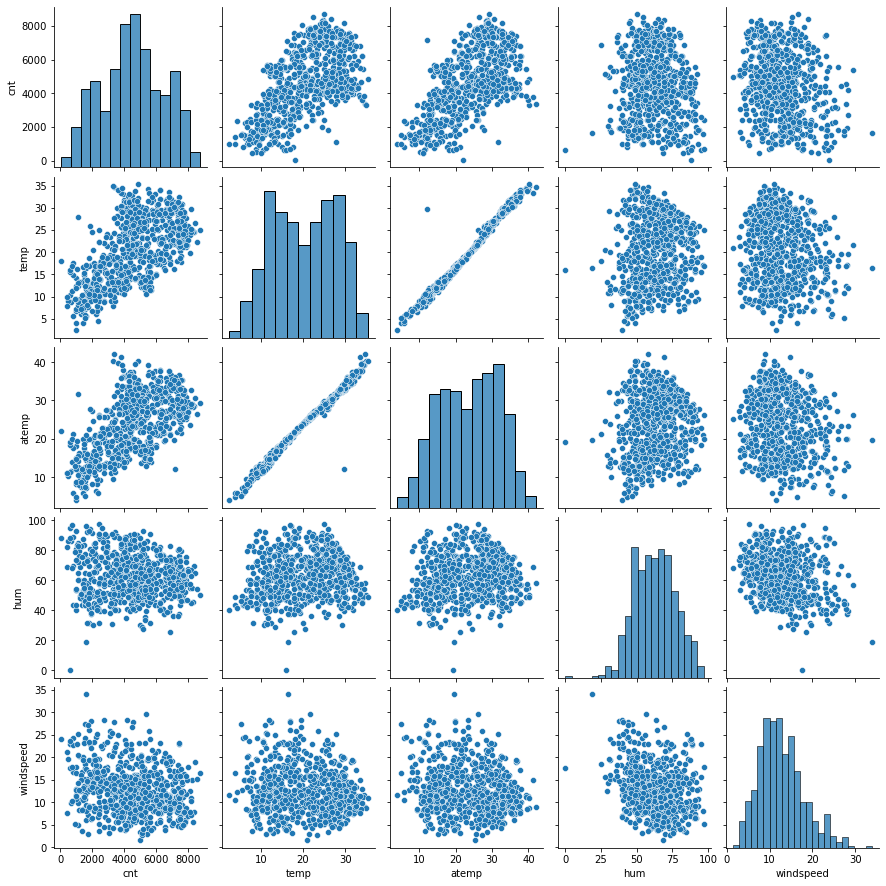

In [31]:
# Creating the pairplots of all the Numeric variable
sns.pairplot(data=bike_data, vars=['cnt','temp','atemp','hum','windspeed'])
plt.show()

<h4> Observation </h4>
<li> The abobe Pair-Plot shows us that there is a Linear Relationship between 'cnt','temp' and 'atemp'</li>

<h4> Visualising Categorical Variables</h4>

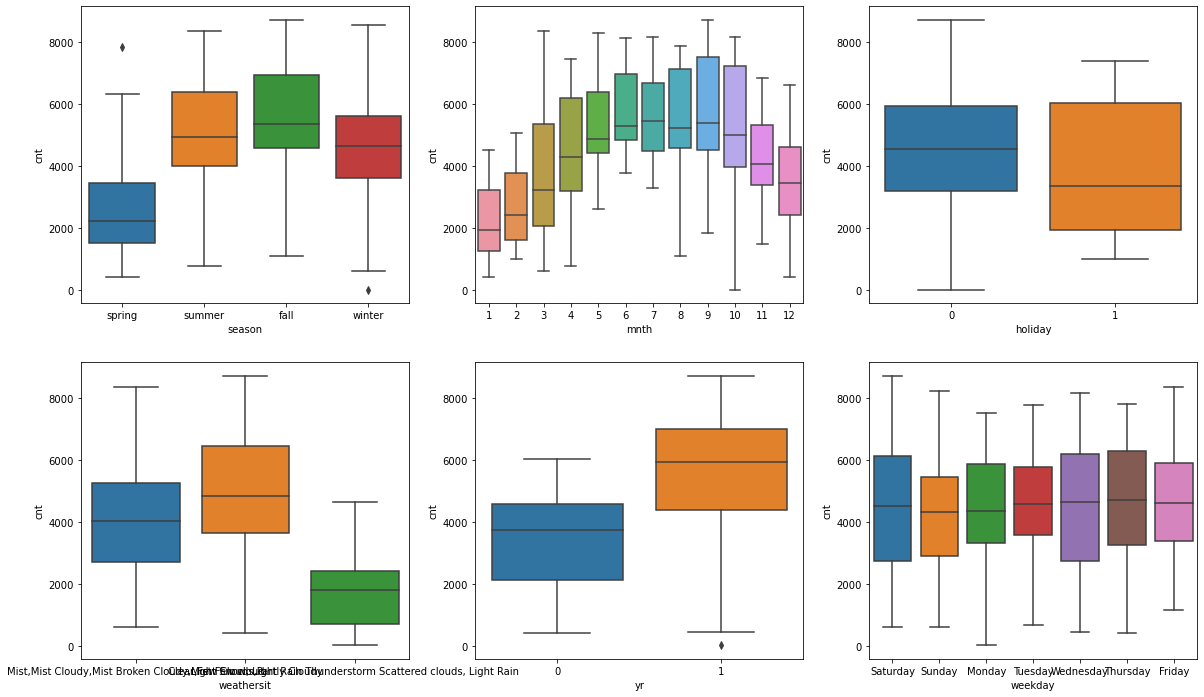

In [35]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season' , y = 'cnt', data = bike_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth' , y = 'cnt', data = bike_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday' , y = 'cnt' ,data = bike_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit' , y = 'cnt', data = bike_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr' , y = 'cnt', data = bike_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday' , y = 'cnt', data = bike_data)
plt.show()

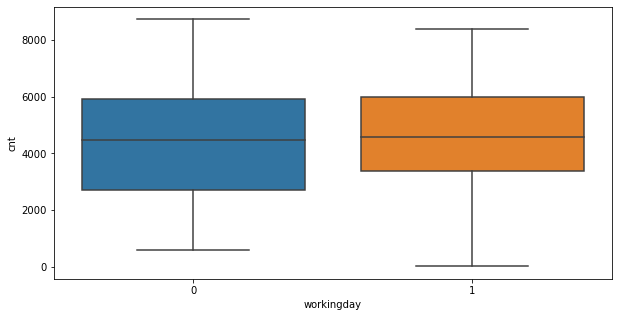

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'workingday' , y = 'cnt', data = bike_data)
plt.show()

<h4> Observation</h4>

<li> The count of bike share is less for the spring</li>
<li> The count of bike share is higher on the holidays</li>
<li> The count of bike sharing has increase in 2019 </li>
<li> The total different value in weather are 4 , whereas the plot shows only 3. Hence the count is zero value for weather - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog </li>
<li> The count increase in summer </li>
<li>The count during the week is almost the same</li>

<h2> Dummy Varaiables</h2>

In [37]:
# from above observation creating dummy variable for "season","mnth", "weathersit","weekday"
dummy_var = bike_data[['season','mnth','weathersit','weekday']]

In [38]:
dummy_var = pd.get_dummies(dummy_var, drop_first = True)

In [40]:
# adding dummy variables to original dataset
bike_data = pd.concat([dummy_var, bike_data], axis = 1)

In [41]:
#show the data
bike_data.head()

,mnth,season_spring,season_summer,season_winter,"weathersit_Light Snow, Light Rain Thunderstorm Scattered clouds, Light Rain","weathersit_Mist,Mist Cloudy,Mist Broken Cloudy,Mist Few cloud",weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,...,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,date_old
0,1,1,0,0,0,1,0,1,0,0,...,0,Saturday,0,"Mist,Mist Cloudy,Mist Broken Cloudy,Mist Few c...",14.110847,18.18125,80.5833,10.749882,985,0
1,1,1,0,0,0,1,0,0,1,0,...,0,Sunday,0,"Mist,Mist Cloudy,Mist Broken Cloudy,Mist Few c...",14.902598,17.68695,69.6087,16.652113,801,1
2,1,1,0,0,0,0,1,0,0,0,...,0,Monday,1,"Clear,Few Clouds,Partly Cloudy",8.050924,9.47025,43.7273,16.636703,1349,2
3,1,1,0,0,0,0,0,0,0,0,...,0,Tuesday,1,"Clear,Few Clouds,Partly Cloudy",8.200000,10.60610,59.0435,10.739832,1562,3
4,1,1,0,0,0,0,0,0,0,0,...,0,Wednesday,1,"Clear,Few Clouds,Partly Cloudy",9.305237,11.46350,43.6957,12.522300,1600,4


In [43]:
bike_data.shape

(730, 25)

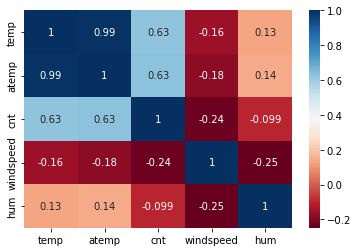

In [47]:
# Checking continuous variables relationship by creating a heat map
sns.heatmap(bike_data[['temp','atemp','cnt','windspeed','hum']].corr(), cmap='RdBu', annot = True)
plt.show()

<h4>Observation </h4>
<li> Here we see that 'temp' and 'atemp' are correlated 0.99 i.e almost 1 (higly correlated) . It seems like atemp is derived from temp so we can drop 'atemp' columns</li>

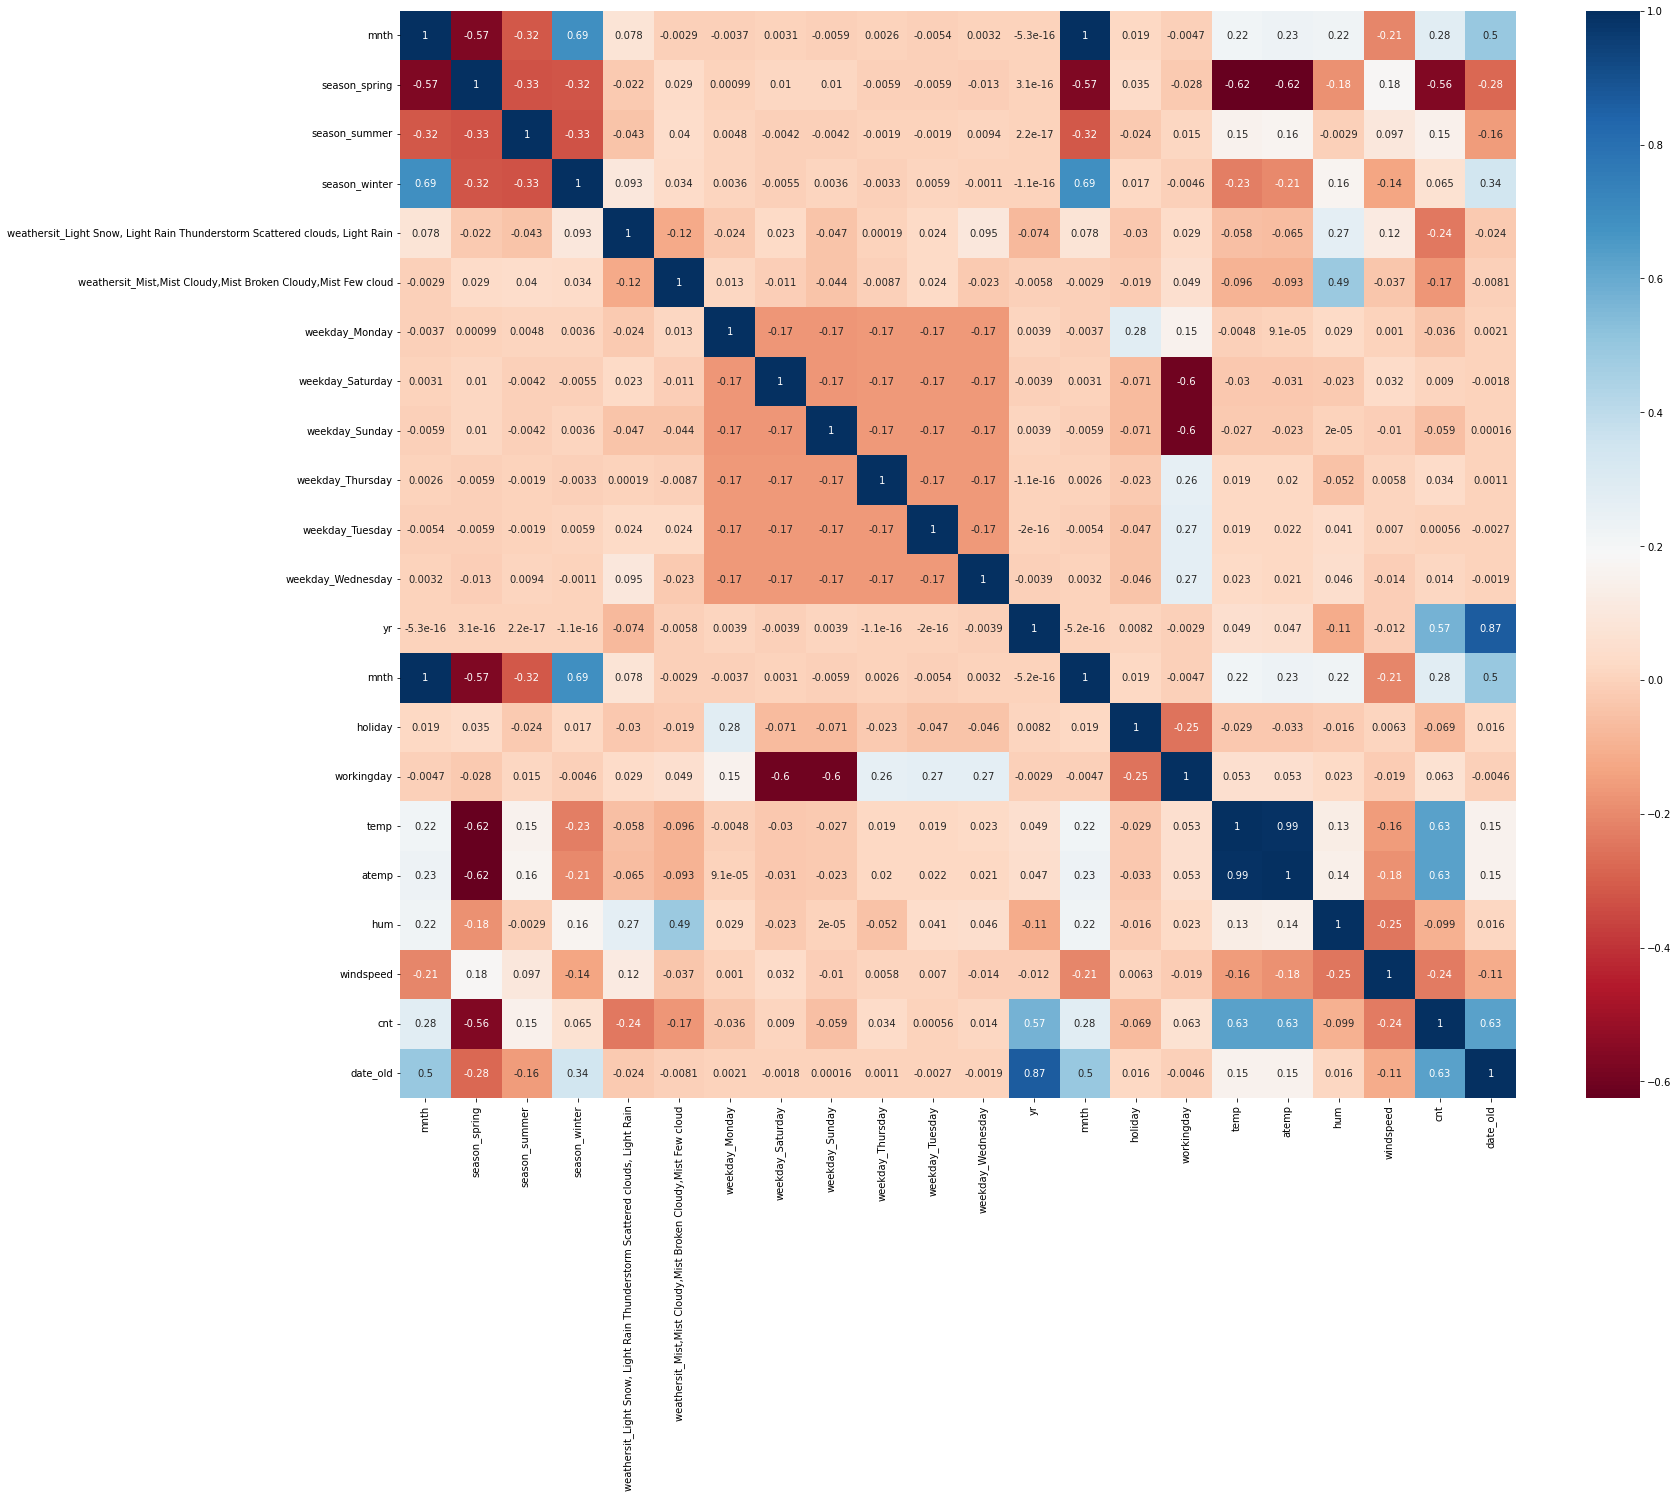

In [49]:
#heatmaps for the whole data
plt.figure(figsize = (25,20))
sns.heatmap(bike_data.corr(), cmap='RdBu',annot= True)
plt.show()

<h4>Observation</h4>
<li>The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.</li>
<li>We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF and p-value, for identifying the correct variable to select/eliminate from the model.</li>

# Step 4: Splitting the Data into Train and Test  data split

<h4>We will first split the data to training and testing dataset which will help us for regression</h4>

In [50]:
bike_train, bike_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [51]:
bike_train.shape

(510, 25)

In [52]:
bike_test.shape

(219, 25)

# Step 5: Rescaling the Features

In [62]:
bike_scaler = MinMaxScaler()

In [63]:
# Apply Scaler here bike_scaler to all the columns except the 'dummy' variable
num_vars = ['cnt','hum','windspeed','temp','atemp']
bike_train[num_vars] = bike_scaler.fit_transform(bike_train[num_vars])

In [64]:
bike_train.head()

,mnth,season_spring,season_summer,season_winter,"weathersit_Light Snow, Light Rain Thunderstorm Scattered clouds, Light Rain","weathersit_Mist,Mist Cloudy,Mist Broken Cloudy,Mist Few cloud",weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,...,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,date_old
653,10,0,0,1,0,0,0,0,0,0,...,0,Tuesday,1,"Clear,Few Clouds,Partly Cloudy",0.509887,0.501133,0.575354,0.300794,0.864243,653
576,7,0,0,0,0,0,0,0,0,0,...,0,Tuesday,1,"Clear,Few Clouds,Partly Cloudy",0.815169,0.766351,0.725633,0.264686,0.827658,576
426,3,1,0,0,0,1,0,1,0,0,...,0,Saturday,0,"Mist,Mist Cloudy,Mist Broken Cloudy,Mist Few c...",0.442393,0.438975,0.640189,0.255342,0.465255,426
728,12,1,0,0,0,0,0,0,1,0,...,0,Sunday,0,"Clear,Few Clouds,Partly Cloudy",0.245101,0.200348,0.498067,0.663106,0.204096,728
482,4,0,1,0,0,1,0,1,0,0,...,0,Saturday,0,"Mist,Mist Cloudy,Mist Broken Cloudy,Mist Few c...",0.395666,0.391735,0.504508,0.188475,0.482973,482


In [65]:
bike_train.describe()

,mnth,season_spring,season_summer,season_winter,"weathersit_Light Snow, Light Rain Thunderstorm Scattered clouds, Light Rain","weathersit_Mist,Mist Cloudy,Mist Broken Cloudy,Mist Few cloud",weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,...,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,date_old
count,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,6.549020,0.243137,0.245098,0.24902,0.029412,0.343137,0.150980,0.154902,0.143137,0.133333,...,0.507843,6.549020,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,367.941176
std,3.468714,0.429398,0.430568,0.43287,0.169124,0.475223,0.358381,0.362166,0.350557,0.340268,...,0.500429,3.468714,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,209.868619
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,186.250000
50%,7.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,7.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,372.000000
75%,10.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,10.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,552.750000
max,12.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,728.000000


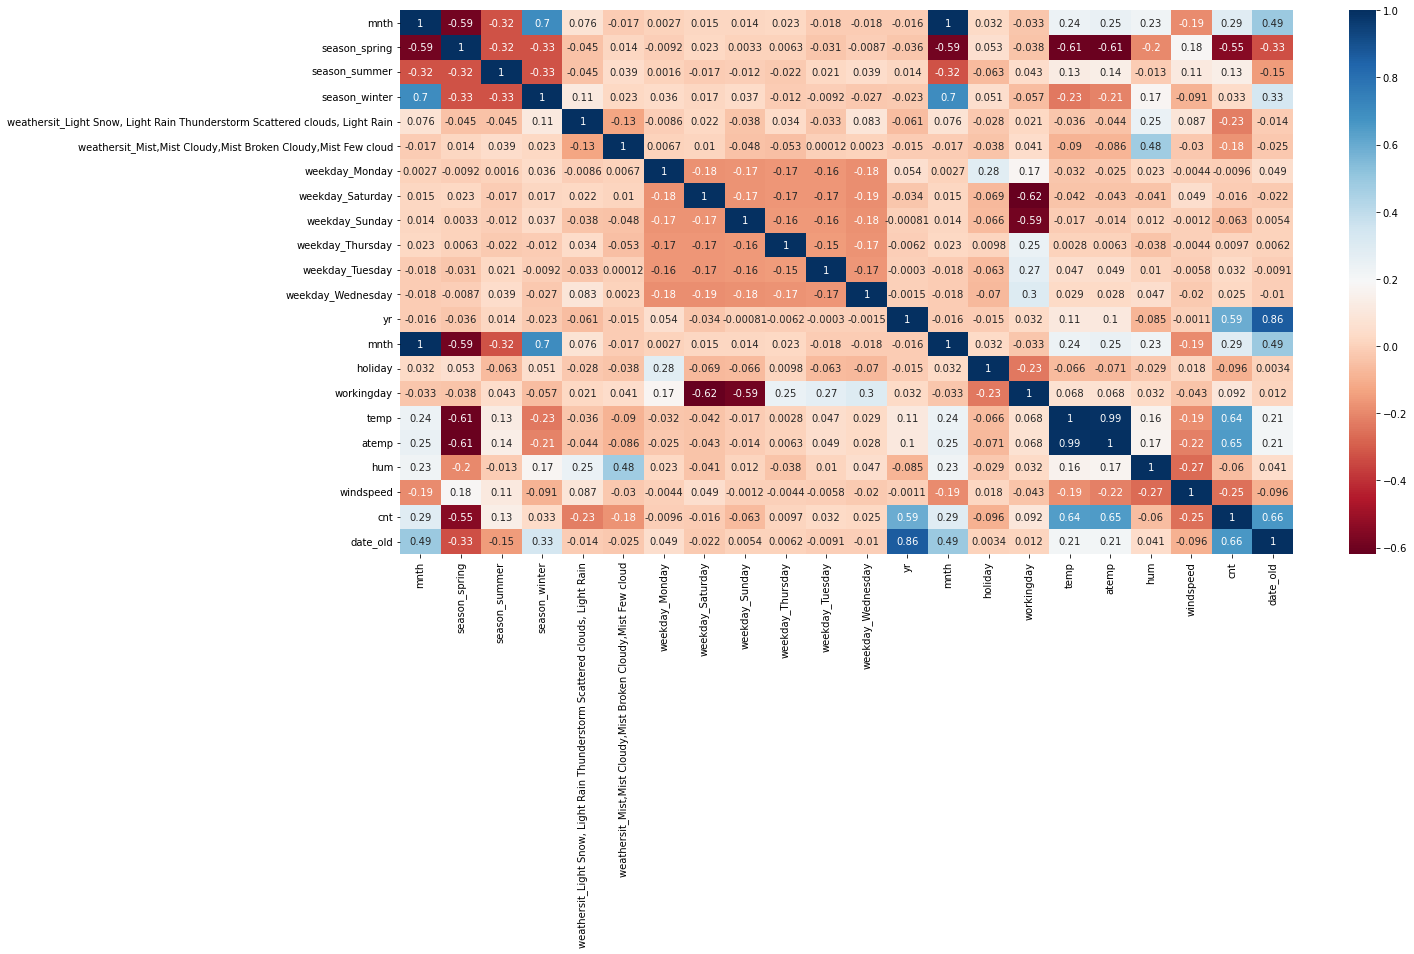

In [66]:
# create heatmap to check for the train data to check the correlation coefficients
plt.figure(figsize = (20, 10))
sns.heatmap(bike_train.corr(), annot = True , cmap = "RdBu")
plt.show()

<h4> We have 2 method to build a model </h4>
<li> Start with one columns and keep adding columns untill the R-squared changed or p-value increase from the treshold</li>
<li> Start will all columns in and keep removing non related one </li>

<h4> We will start with all columns for model building </h4>